<div style="text-align: right;">
    <strong>Author:</strong> Mizanu Zelalem Degu  <br>
    <strong>Institution:</strong> Jimma University Institute of Technology  <br>
    Image Processing - lab 1
</div>

# Lab 1: Image Processing Fundamentals

Loading an image is the first step in any image processing pipeline. Digital images are stored as arrays of pixel values. Pillow (PIL) and OpenCV are two popular libraries for image handling.

Pillow: Primarily handles images in RGB format

OpenCV: Uses BGR format by default for color images

In [1]:
# Using Pillow
from PIL import Image
import numpy as np

# Load image with Pillow
pil_img = Image.open('sample_1channel.jpg')
print("Pillow image mode:", pil_img.mode)

# Using OpenCV
import cv2

# Load image with OpenCV (bu default opencv interpret an image as 3-channel. thus specify the scale of the image)
cv_img = cv2.imread('sample_1channel.jpg', cv2.IMREAD_GRAYSCALE)
print("OpenCV image shape:", cv_img.shape)

# Convert between formats
# OpenCV to Pillow
cv_to_pil = Image.fromarray(cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB))
# Pillow to OpenCV
pil_to_cv = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

Pillow image mode: L
OpenCV image shape: (300, 332)


## 1.2 Displaying an Image

### 1.2.1 Plotting an Image as a Surface

Images can be visualized as 3D surfaces where x,y coordinates represent pixel positions and z-axis represents intensity values. This helps understand intensity variations.

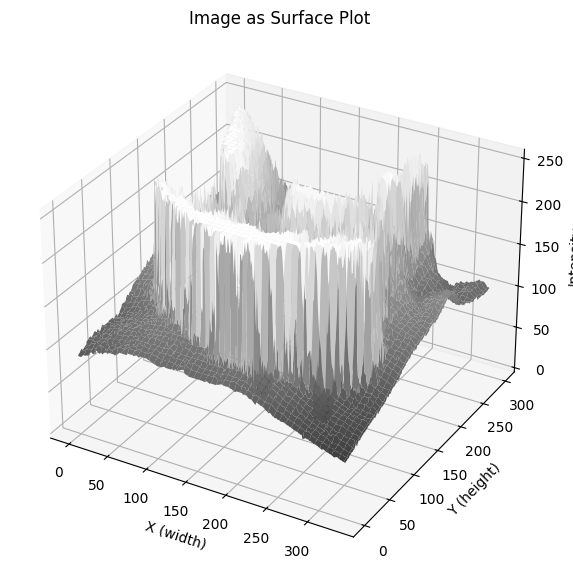

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cv_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)

h, w = cv_img.shape

# Create grid
x = np.arange(0, w, 1)
y = np.arange(0, h, 1)
x, y = np.meshgrid(x, y)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, cv_img, cmap='gray')
ax.set_title('Image as Surface Plot')
ax.set_xlabel('X (width)')
ax.set_ylabel('Y (height)')
ax.set_zlabel('Intensity')
plt.show()

### 1.2.2 Plotting an Image as a 2D Tensor

Images are fundamentally 2D (grayscale) or 3D (color) tensors. Visualizing them as matrices helps understand their numerical representation.

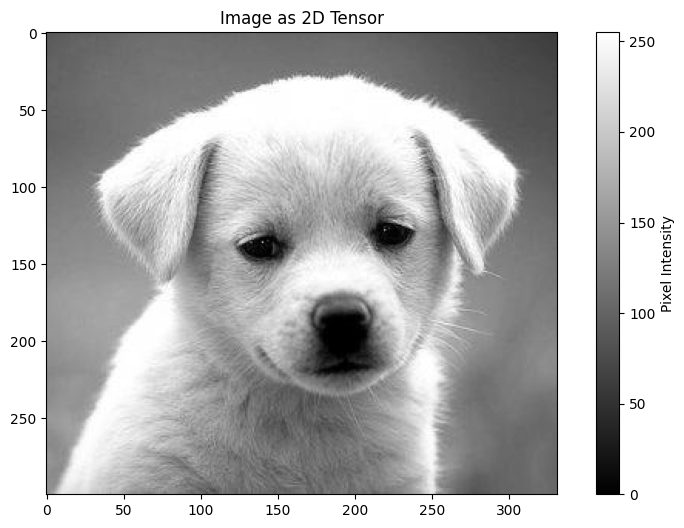

In [3]:
gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 6))
plt.imshow(gray_img, cmap='gray')
plt.title('Image as 2D Tensor')
plt.colorbar(label='Pixel Intensity')
plt.show()

### 1.2.3 Printing an Image as a 2D Array

Digital images are stored as arrays. Examining these values helps understand how image processing operations modify pixel values.

In [4]:
# Display a small portion (10x10 pixels) of the image array
gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)

print("Image array (10x10 sample):")
print(gray_img[:10, :10])

Image array (10x10 sample):
[[89 88 88 88 88 89 90 91 91 91]
 [89 89 88 88 89 90 90 91 91 91]
 [90 89 89 89 89 90 91 92 92 92]
 [90 90 90 90 90 91 92 92 93 93]
 [91 91 90 90 91 92 93 93 93 94]
 [92 92 91 91 92 92 93 94 94 94]
 [93 92 92 92 92 93 94 95 95 95]
 [93 93 92 92 92 93 94 95 95 95]
 [91 91 92 93 94 94 95 95 95 95]
 [91 91 92 93 94 94 95 95 96 96]]


## 1.3 Basic Intensity Transformation Functions

### 1.3.1 Negative Image

The negative of an image is obtained by subtracting each pixel value from the maximum intensity value (L-1 for L intensity levels):

s = (L-1) - r

Where:

r = input pixel value

s = output pixel value

L = maximum intensity value (typically 255 for 8-bit images)

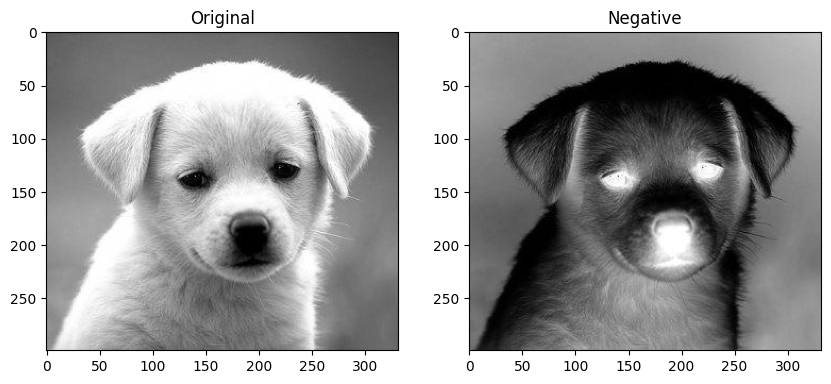

In [25]:
gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)

def negative_image(image):
    return 255 - image

neg_img = negative_image(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(neg_img, cmap='gray'), plt.title('Negative')
plt.show()

### 1.3.2 Log Transform and Inverse Log Transform

Log transform compresses high intensity values while expanding low ones, useful for images with large dynamic range.

Log transform: s = c * log(1 + r)
Inverse log (exponential) transform: s = c * (exp(r) - 1)

Where c is a scaling constant.

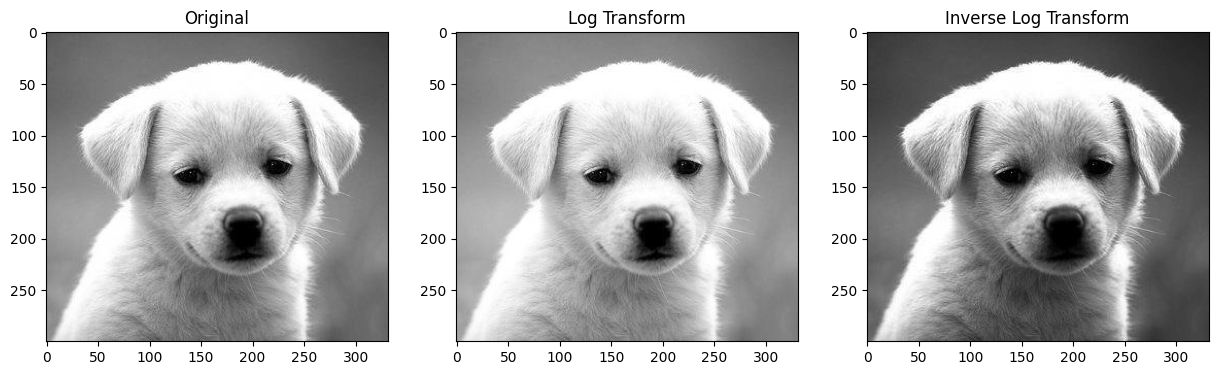

In [5]:
def log_transform(image, c=1):
    # Add 1 to avoid log(0)
    return c * np.log1p(image)

def inv_log_transform(image, c=1):
    return c * (np.exp(image) - 1)


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
# Normalize image to [0,1] before log transform
norm_img = gray_img / 255.0
log_img = log_transform(norm_img, c=3)
inv_log_img = inv_log_transform(log_img, c=3)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(norm_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(log_img, cmap='gray'), plt.title('Log Transform')
plt.subplot(133), plt.imshow(inv_log_img, cmap='gray'), plt.title('Inverse Log Transform')
plt.show()

### 1.3.3 Gamma Transform

Gamma correction adjusts image brightness non-linearly according to:

s = c * r^γ

Where:

γ < 1: enhances dark regions

γ > 1: enhances bright regions

c is a scaling constant

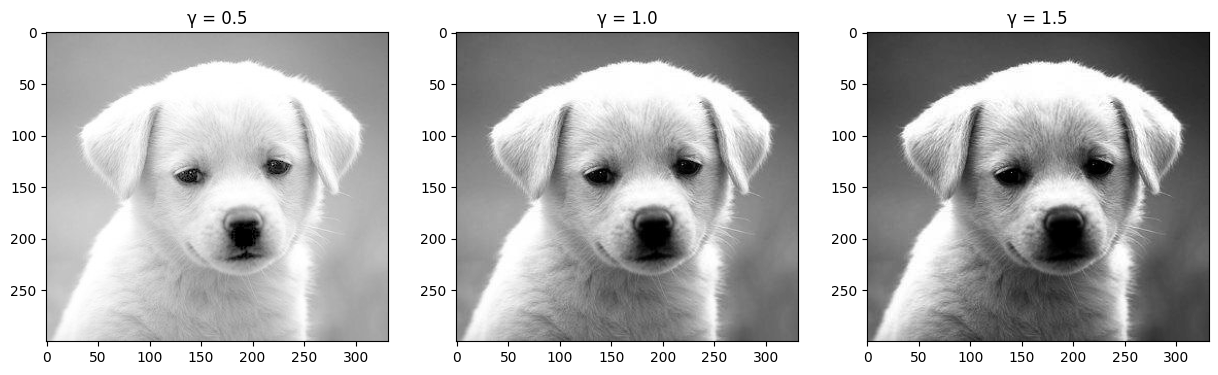

In [30]:
def gamma_transform(image, gamma=1.0, c=1):
    return c * np.power(image, gamma)


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
# Normalize image to [0,1] before log transform
norm_img = gray_img / 255.0
# Apply different gamma values
gamma_05 = gamma_transform(norm_img, gamma=0.5)
gamma_10 = gamma_transform(norm_img, gamma=1.0)
gamma_15 = gamma_transform(norm_img, gamma=1.5)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gamma_05, cmap='gray'), plt.title('γ = 0.5')
plt.subplot(132), plt.imshow(gamma_10, cmap='gray'), plt.title('γ = 1.0')
plt.subplot(133), plt.imshow(gamma_15, cmap='gray'), plt.title('γ = 1.5')
plt.show()

# 1.4 Image histogram

An image histogram is a graphical representation of the tonal distribution in a digital image. It plots the number of pixels for each tonal value (0-255 for 8-bit images).

For a grayscale image with L intensity levels (typically 256), the histogram is a discrete function:

h(r_k) = n_k

Where:

r_k = kth intensity level

n_k = number of pixels with intensity r_k

The normalized histogram is:

p(r_k) = n_k / (M×N)

Where M×N is the total number of pixels.

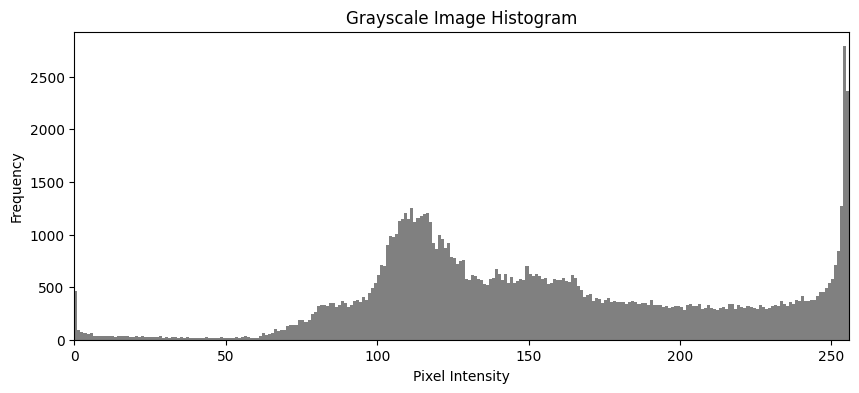

In [2]:
import cv2
import matplotlib.pyplot as plt
def plot_histogram(image, title='Image Histogram'):
    plt.figure(figsize=(10, 4))
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.show()

gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
# Plot histogram of our grayscale image
plot_histogram(gray_img, 'Grayscale Image Histogram')

### 1.4.1 Histogram Equalization

Theoretical Explanation:
Histogram equalization improves contrast by spreading out the most frequent intensity values. The transformation function is:

s_k = T(r_k) = (L-1) * Σ_{j=0}^k p_r(r_j)

Where:

s_k = output intensity value

r_k = input intensity value

p_r(r_j) = normalized histogram value for intensity r_j

L = number of possible intensity levels

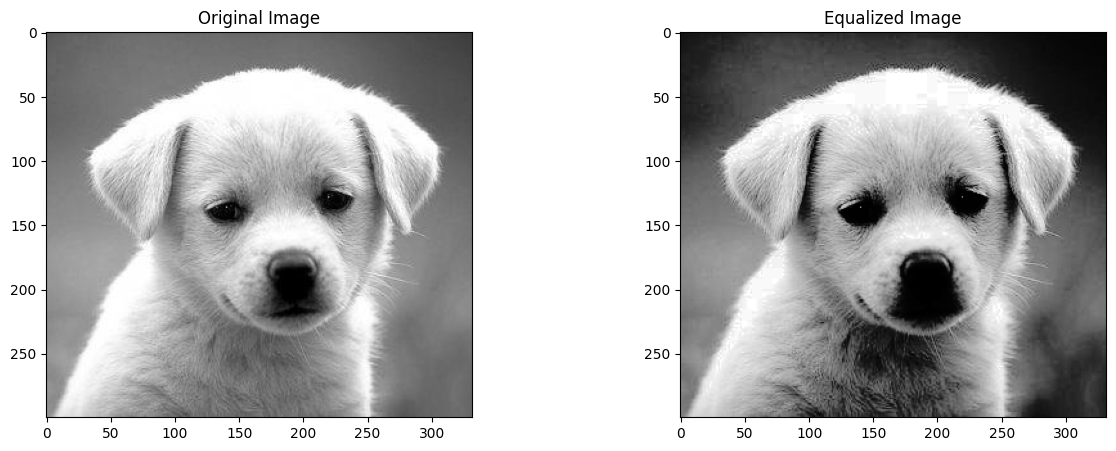

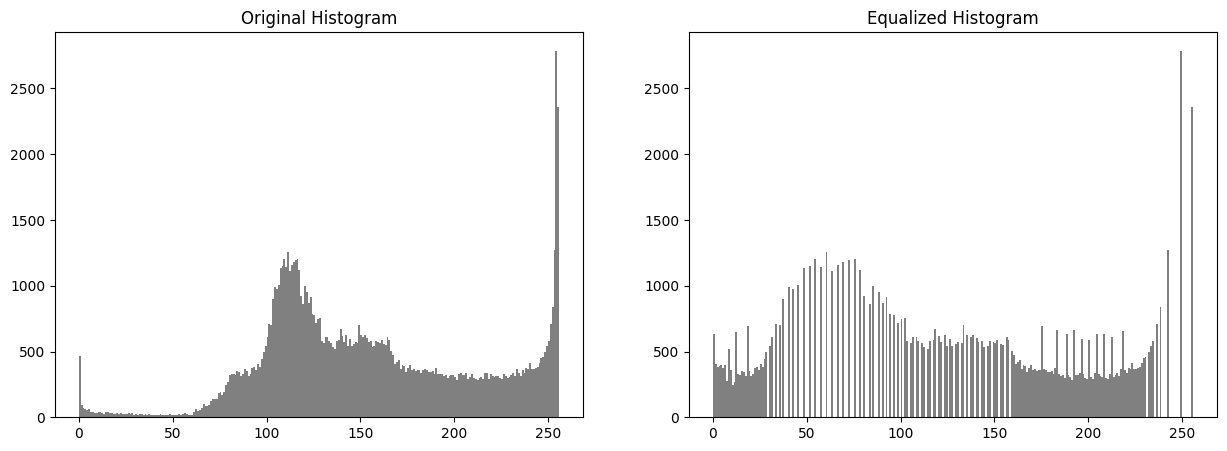

In [6]:
def histogram_equalization(image):
    # For grayscale images
    if len(image.shape) == 2:
        return cv2.equalizeHist(image)


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
# Apply histogram equalization
eq_img = histogram_equalization(gray_img)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(eq_img, cmap='gray'), plt.title('Equalized Image')
plt.show()

# Compare histograms
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(gray_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Original Histogram')
plt.subplot(122)
plt.hist(eq_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Equalized Histogram')
plt.show()

### 1.4.2 Histogram Matching (Specification)

Histogram matching transforms an image so that its histogram matches a specified target histogram. The process involves:

Compute histogram of source image and target image

Compute their cumulative distribution functions (CDFs)

For each pixel in source image, find the intensity value in target image whose CDF is closest to the source CDF

Mathematically:

Compute s = T(r) = (L-1) * CDF_r(r)

Compute v = G(z) = (L-1) * CDF_z(z)

Find z for each s such that G(z) ≈ s

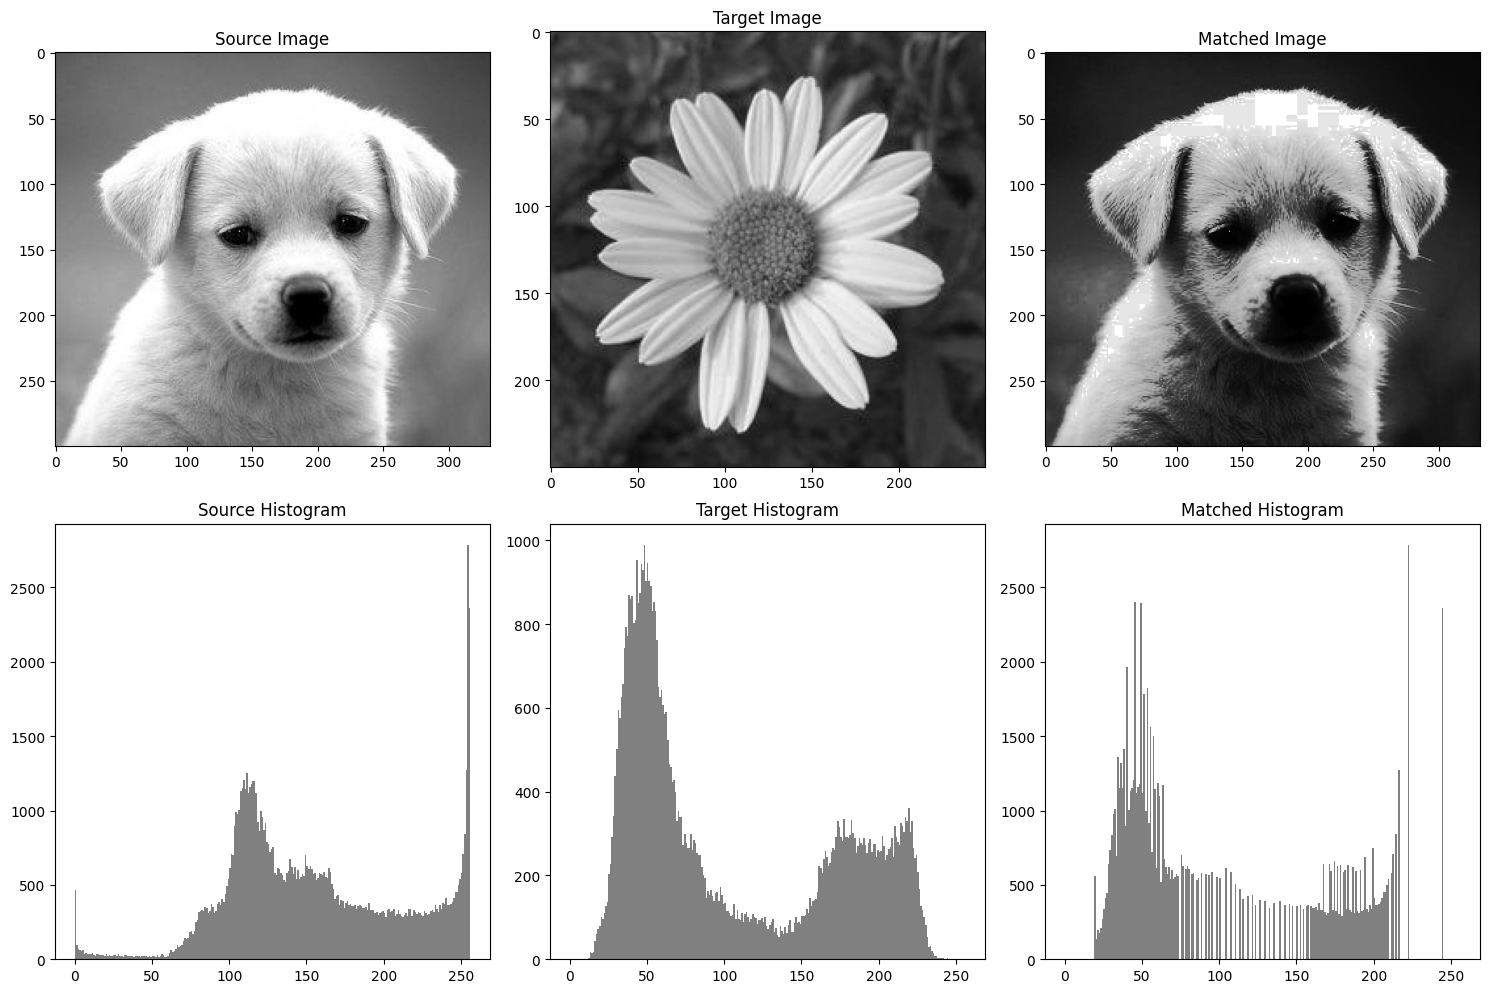

In [13]:
import numpy as np
def histogram_matching(source, target):
    """
    Adjust the pixel values of a source image so that its histogram
    matches the histogram of a target image
    """
    # Convert to float32 for calculations
    source = source.astype(np.float32)
    target = target.astype(np.float32)
    
    # Compute histograms and CDFs
    src_hist = cv2.calcHist([source], [0], None, [256], [0, 256]).ravel()
    tgt_hist = cv2.calcHist([target], [0], None, [256], [0, 256]).ravel()
    
    # Normalize histograms
    src_hist = src_hist / source.size
    tgt_hist = tgt_hist / target.size
    
    # Compute CDFs
    src_cdf = np.cumsum(src_hist)
    tgt_cdf = np.cumsum(tgt_hist)
    
    # Create mapping function
    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        mapping[i] = np.argmin(np.abs(tgt_cdf - src_cdf[i]))
    
    # Apply mapping
    matched = mapping[source.astype(np.uint8)]
    return matched.astype(np.uint8)

# Create a target image with desired histogram (e.g., linear ramp)
# target_img = np.tile(np.linspace(0, 255, 256, dtype=np.uint8), (gray_img.shape[0], 1))
target_img = cv2.imread('reference_image.jpg', cv2.IMREAD_GRAYSCALE)
gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)


# Apply histogram matching
matched_img = histogram_matching(gray_img, target_img)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(231), plt.imshow(gray_img, cmap='gray'), plt.title('Source Image')
plt.subplot(232), plt.imshow(target_img, cmap='gray'), plt.title('Target Image')
plt.subplot(233), plt.imshow(matched_img, cmap='gray'), plt.title('Matched Image')

plt.subplot(234)
plt.hist(gray_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Source Histogram')

plt.subplot(235)
plt.hist(target_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Target Histogram')

plt.subplot(236)
plt.hist(matched_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Matched Histogram')

plt.tight_layout()
plt.show()